# TASK 1P

### Name : M.Rachel

#### Student ID : s224234147

#### Email Address : rachelriney1608@gmail.com

**1) What is the selected dataset and what is the related problem for this dataset? You need to provide details of datasets, dataset description, what are the features, output (class label) and discuss the problem that needs to be solved by machine learning model.**

## Dataset Overview
The ML model should be built using a dataset https://archive.ics.uci.edu/dataset/336/chronic%2Bkidney%2Bdisease. This dataset is in the format of .arff which is zipped twice through https://pulipulichen.github.io/jieba-js/weka/arff2csv/ we can convert into csv file 'ckd_data_df.csv'. It contains information related to early stages of Chronic Kidney Disease (CKD) among Indian
patients.

## Dataset Description:
To understand the relationships between variables and their potential impact on the presence or absence
of early-stage Chronic Kidney Disease (CKD).

Age, Blood Pressure (BP), Specific Gravity (SG), Pedal Edema
(PE), Appetite (Appet),Urine Analysis Albumin (AL), Sugar (SU), Red Blood Cells (RBC), Pus Cell
(PC), Pus Cell Clumps (PCC), Bacteria (BA),Blood Analysis
Blood Glucose Random (BGR), Blood Urea (BU), Serum
Creatinine (SC), Sodium (SOD), Potassium (POT), Hemoglobin
(Hemo), Packed Cell Volume (PCV), White Blood Cell Count
(WBCC), Red Blood Cell Count (RBCC)
Medical History Hypertension (HTN), Diabetes Mellitus (DM), Coronary Artery
Disease (CAD), Anemia (Ane)

The output or target variable in this dataset would likely indicate the presence or absence of earlystage
CKD.
* ckd represents the presence of CKD.
* notckd represents the absence of CKD.
We Label Encode the Target to build model and make prediction.

There are "?" values are present in the dataset is need to be cleaned.


## PROBLEM NEEDS TO BE SOLVED
  The problem that needs to be solved by a machine learning model using this dataset is likely classification.Specifically, the goal would be to build a predictive model that can accurately classify individuals into early-stage CKD or non-CKD groups based on their demographic information, medical history, symptoms, and laboratory test results. The model that is developed by Decision Trees that is splitted into training and testing Dataset.

**2)You need to provide the screenshot of the built ML pipeline (Data ingestion, Data preparation, model training and evaluating the model). You need to provide a cell by cell explanation of the code.**

In [1]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

#Label Encoding
from sklearn.preprocessing import LabelEncoder


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

# DATA INGESTION

In [2]:
df = pd.read_csv('ckd_data_df.csv')
df.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.dtypes

id          int64
'age'      object
'bp'       object
'sg'       object
'al'       object
'su'       object
'rbc'      object
'pc'       object
'pcc'      object
'ba'       object
'bgr'      object
'bu'       object
'sc'       object
'sod'      object
'pot'      object
'hemo'     object
'pcv'      object
'wbcc'     object
'rbcc'     object
'htn'      object
'dm'       object
'cad'      object
'appet'    object
'pe'       object
'ane'      object
'class'    object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       400 non-null    int64 
 1   'age'    400 non-null    object
 2   'bp'     400 non-null    object
 3   'sg'     400 non-null    object
 4   'al'     400 non-null    object
 5   'su'     400 non-null    object
 6   'rbc'    400 non-null    object
 7   'pc'     400 non-null    object
 8   'pcc'    400 non-null    object
 9   'ba'     400 non-null    object
 10  'bgr'    400 non-null    object
 11  'bu'     400 non-null    object
 12  'sc'     400 non-null    object
 13  'sod'    400 non-null    object
 14  'pot'    400 non-null    object
 15  'hemo'   400 non-null    object
 16  'pcv'    400 non-null    object
 17  'wbcc'   400 non-null    object
 18  'rbcc'   400 non-null    object
 19  'htn'    400 non-null    object
 20  'dm'     399 non-null    object
 21  'cad'    400 non-null    object
 22  'a

In [6]:
df.drop('id', axis=1, inplace=True)

In [7]:
df.shape

(400, 25)

In [8]:
df.isnull().sum()

'age'      0
'bp'       0
'sg'       0
'al'       0
'su'       0
'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'bgr'      0
'bu'       0
'sc'       0
'sod'      0
'pot'      0
'hemo'     0
'pcv'      0
'wbcc'     0
'rbcc'     0
'htn'      0
'dm'       1
'cad'      0
'appet'    0
'pe'       0
'ane'      0
'class'    0
dtype: int64

## Data Preparation:

* Converting Columns.
* Replacing '?' with NAN 
* Converting age', 'bp', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc' to numeric columns.
* Converting to 'sg', 'al', 'su', 'rbc', 'pc', 'pcc','ba','htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class' to Categorical Columns.

In [9]:
df.rename(columns={"'age'": 'age',"'bp'": 'bp',"'sg'": 'sg',"'al'": 'al',"'su'": 'su',"'rbc'": 'rbc',
                  "'pc'": 'pc',"'pcc'": 'pcc',"'ba'": 'ba',"'bgr'": 'bgr',"'bu'": 'bu',"'sc'": 'sc',
                  "'sod'": 'sod',"'pot'": 'pot',"'hemo'": 'hemo',"'pcv'": 'pcv',"'wbcc'": 'wbcc',
                  "'rbcc'": 'rbcc',"'htn'": 'htn',"'dm'": 'dm',"'cad'": 'cad',"'appet'": 'appet',
                  "'pe'": 'pe',"'ane'": 'ane',"'class'": 'class',}, inplace=True)

In [12]:
df.replace('?',np.nan,inplace=True)

In [13]:
columns_to_convert = ['age', 'bp', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

In [14]:
numeric_columns = ['age', 'bp', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


for col in numeric_columns:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)

In [15]:
categorical_columns = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc','ba','htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class']


# Replace NaN values with mean for selected columns
for col in categorical_columns:
    col_mode = df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

In [16]:
df.isna().sum() * 100 / len(df)

age     0.000000
bp      0.000000
sg      0.000000
al      0.000000
su      0.000000
rbc     0.000000
pc      0.000000
pcc     0.000000
ba      0.000000
bgr     0.000000
bu      0.000000
sc      0.000000
sod     0.000000
pot     0.000000
hemo    0.000000
pcv     0.000000
wbcc    0.000000
rbcc    0.000000
htn     0.000000
dm      0.000000
cad     0.000000
appet   0.000000
pe      0.000000
ane     0.000000
class   0.000000
dtype: float64

## Describe the dataset 
The Summary statistics for the numerical columns of the dataset, it shows us the count,
mean, standard deviation, minimum value, maximum value, 25th percentile, 50th percentile or the
median and 75th percentile values.

In [17]:
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.476298,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


## Counting the values of Numeric columns

In [18]:
print("Age:",df.age.value_counts())

Age: age
60.000000    19
65.000000    17
48.000000    12
50.000000    12
55.000000    12
47.000000    11
56.000000    10
59.000000    10
45.000000    10
54.000000    10
62.000000    10
46.000000     9
61.000000     9
34.000000     9
51.483376     9
70.000000     9
57.000000     8
71.000000     8
64.000000     8
73.000000     8
68.000000     8
63.000000     7
67.000000     7
30.000000     7
72.000000     7
44.000000     6
43.000000     6
35.000000     6
42.000000     6
33.000000     6
69.000000     6
53.000000     5
58.000000     5
75.000000     5
51.000000     5
66.000000     5
52.000000     5
76.000000     5
41.000000     5
23.000000     4
40.000000     4
39.000000     4
80.000000     4
24.000000     4
8.000000      3
29.000000     3
17.000000     3
74.000000     3
37.000000     3
25.000000     3
32.000000     3
38.000000     3
36.000000     2
28.000000     2
20.000000     2
19.000000     2
49.000000     2
5.000000      2
12.000000     2
21.000000     2
15.000000     2
3.000000      1

In [19]:
print("Blood Pressure:",df.bp.value_counts())

Blood Pressure: bp
80.000000     116
70.000000     112
60.000000      71
90.000000      53
100.000000     25
76.469072      12
50.000000       5
110.000000      3
140.000000      1
180.000000      1
120.000000      1
Name: count, dtype: int64


In [20]:
print("BGR:",df.bgr.value_counts())

BGR: bgr
148.036517    44
99.000000     10
93.000000      9
100.000000     9
107.000000     8
131.000000     6
140.000000     6
109.000000     6
92.000000      6
117.000000     6
130.000000     6
70.000000      5
114.000000     5
123.000000     5
102.000000     5
132.000000     5
104.000000     5
95.000000      5
124.000000     5
125.000000     5
122.000000     5
94.000000      4
113.000000     4
111.000000     4
118.000000     4
120.000000     4
139.000000     4
133.000000     4
119.000000     4
129.000000     4
91.000000      4
121.000000     4
88.000000      4
76.000000      4
106.000000     4
150.000000     3
89.000000      3
105.000000     3
78.000000      3
127.000000     3
214.000000     3
171.000000     3
172.000000     3
128.000000     3
112.000000     3
79.000000      3
108.000000     3
74.000000      3
103.000000     3
82.000000      3
97.000000      3
81.000000      3
219.000000     3
137.000000     3
98.000000      2
208.000000     2
153.000000     2
204.000000     2
192.0

In [21]:
print("Bu:",df.bu.value_counts())

Bu: bu
57.425722     19
46.000000     15
25.000000     13
19.000000     11
40.000000     10
15.000000      9
48.000000      9
50.000000      9
18.000000      9
32.000000      8
49.000000      8
26.000000      8
27.000000      8
17.000000      7
20.000000      7
38.000000      7
16.000000      7
30.000000      7
36.000000      7
44.000000      7
28.000000      7
23.000000      6
29.000000      6
45.000000      6
24.000000      6
37.000000      6
31.000000      6
39.000000      6
22.000000      6
55.000000      5
35.000000      5
33.000000      5
53.000000      5
42.000000      5
66.000000      5
51.000000      4
41.000000      4
68.000000      4
47.000000      4
34.000000      4
60.000000      3
96.000000      3
52.000000      3
107.000000     3
80.000000      3
106.000000     3
125.000000     3
132.000000     2
58.000000      2
82.000000      2
73.000000      2
98.000000      2
111.000000     2
77.000000      2
56.000000      2
54.000000      2
72.000000      2
86.000000      2
90.0000

In [22]:
print("Sc:",df.sc.value_counts())

Sc: sc
1.200000     40
1.100000     24
0.500000     23
1.000000     23
0.900000     22
0.700000     22
0.600000     18
3.072454     17
0.800000     17
2.200000     10
1.500000      9
1.700000      9
1.300000      8
1.600000      8
2.500000      7
1.800000      7
2.800000      7
1.400000      7
1.900000      6
3.300000      5
2.000000      5
2.700000      5
2.100000      5
3.200000      5
7.300000      4
3.900000      4
5.300000      3
2.400000      3
2.900000      3
3.400000      3
2.300000      3
4.000000      3
4.400000      2
6.700000      2
6.000000      2
5.600000      2
6.500000      2
6.100000      2
5.200000      2
3.000000      2
6.300000      2
7.200000      2
4.600000      2
4.100000      2
11.800000     1
48.100000     1
14.200000     1
16.400000     1
2.600000      1
7.500000      1
4.300000      1
18.100000     1
6.400000      1
3.800000      1
9.300000      1
6.800000      1
13.500000     1
12.800000     1
11.900000     1
12.000000     1
13.400000     1
15.200000     1
1

In [23]:
print("sod:",df.sod.value_counts())

sod: sod
137.528754    87
135.000000    40
140.000000    25
141.000000    22
139.000000    21
142.000000    20
138.000000    20
137.000000    19
150.000000    17
136.000000    17
147.000000    13
145.000000    11
146.000000    10
132.000000    10
144.000000     9
131.000000     9
133.000000     8
130.000000     7
134.000000     6
143.000000     4
127.000000     3
124.000000     3
114.000000     2
125.000000     2
120.000000     2
113.000000     2
128.000000     2
122.000000     2
104.000000     1
129.000000     1
115.000000     1
4.500000       1
163.000000     1
111.000000     1
126.000000     1
Name: count, dtype: int64


In [24]:
print("pot:",df.pot.value_counts())

pot: pot
4.627244     88
3.500000     30
5.000000     30
4.900000     27
4.700000     17
4.800000     16
4.000000     14
4.100000     14
4.400000     14
3.900000     14
3.800000     14
4.200000     14
4.500000     13
4.300000     12
3.700000     12
3.600000      8
4.600000      7
3.400000      5
5.200000      5
5.700000      4
5.300000      4
6.300000      3
5.400000      3
2.900000      3
3.300000      3
5.500000      3
3.200000      3
2.500000      2
5.900000      2
5.800000      2
5.600000      2
3.000000      2
6.500000      2
7.600000      1
39.000000     1
6.400000      1
47.000000     1
5.100000      1
2.800000      1
2.700000      1
6.600000      1
Name: count, dtype: int64


In [25]:
print("hemo:",df.hemo.value_counts())

hemo: hemo
12.526437    52
15.000000    16
10.900000     8
13.600000     7
13.000000     7
9.800000      7
11.100000     7
10.300000     6
11.300000     6
13.900000     6
12.000000     6
15.400000     5
14.800000     5
14.300000     5
10.000000     5
7.900000      5
14.000000     5
12.600000     5
9.700000      5
11.200000     5
10.800000     5
13.700000     4
12.400000     4
16.100000     4
13.500000     4
11.900000     4
15.800000     4
9.100000      4
13.200000     4
15.200000     4
13.800000     4
12.200000     4
14.100000     4
15.500000     4
17.000000     4
13.400000     4
12.500000     4
15.700000     3
16.300000     3
11.800000     3
14.400000     3
11.400000     3
11.600000     3
16.200000     3
14.500000     3
15.900000     3
9.600000      3
14.900000     3
16.400000     3
16.500000     3
11.500000     3
12.700000     3
14.200000     3
9.400000      3
15.300000     3
8.600000      3
9.500000      3
15.600000     3
10.100000     3
17.800000     3
11.000000     3
8.100000     

In [26]:
print("pcv:",df.pcv.value_counts())

pcv: pcv
38.884498    71
41.000000    21
52.000000    21
44.000000    19
48.000000    19
40.000000    16
43.000000    15
45.000000    13
42.000000    13
36.000000    12
33.000000    12
28.000000    12
32.000000    12
50.000000    12
37.000000    11
34.000000    11
46.000000     9
30.000000     9
29.000000     9
35.000000     9
31.000000     8
24.000000     7
39.000000     7
26.000000     6
38.000000     5
53.000000     4
51.000000     4
49.000000     4
47.000000     4
54.000000     4
25.000000     3
22.000000     3
27.000000     3
19.000000     2
23.000000     2
15.000000     1
21.000000     1
20.000000     1
17.000000     1
9.000000      1
18.000000     1
16.000000     1
14.000000     1
Name: count, dtype: int64


In [27]:
print("wbcc:",df.wbcc.value_counts())

wbcc: wbcc
8406.122449     106
9800.000000      11
6700.000000      10
9600.000000       9
7200.000000       9
9200.000000       9
6900.000000       8
5800.000000       8
11000.000000      8
7800.000000       7
7000.000000       7
9400.000000       7
9100.000000       7
10500.000000      6
6300.000000       6
4300.000000       6
10700.000000      6
8300.000000       5
8600.000000       5
5600.000000       5
5000.000000       5
7500.000000       5
10200.000000      5
9500.000000       5
8100.000000       5
6200.000000       5
7900.000000       5
5500.000000       4
6500.000000       4
6800.000000       4
8400.000000       4
6000.000000       4
7700.000000       4
10400.000000      4
4700.000000       4
10300.000000      4
7300.000000       3
5400.000000       3
4500.000000       3
4200.000000       3
6400.000000       3
7400.000000       3
8000.000000       3
9300.000000       2
12400.000000      2
5700.000000       2
15200.000000      2
12800.000000      2
8800.000000       2
9000.0000

In [28]:
print("rbcc:",df.rbcc.value_counts())

rbcc: rbcc
4.707435    131
5.200000     18
4.500000     16
4.900000     14
4.700000     11
3.900000     10
5.000000     10
4.800000     10
4.600000      9
3.400000      9
5.900000      8
3.700000      8
6.100000      8
5.500000      8
5.400000      7
5.300000      7
5.800000      7
3.800000      7
4.200000      6
4.300000      6
4.000000      6
5.600000      6
5.100000      5
6.200000      5
6.400000      5
5.700000      5
6.500000      5
4.100000      5
4.400000      5
3.200000      5
6.000000      4
3.600000      4
6.300000      4
3.300000      3
3.000000      3
3.500000      3
2.600000      2
2.800000      2
2.900000      2
2.500000      2
2.700000      2
2.100000      2
3.100000      2
2.300000      1
2.400000      1
8.000000      1
Name: count, dtype: int64


## DATA VISUALIZATION
The below histogram of the numeric columns in the dataset.
columns make be skewed towards the right or towards the left or infact they made symmetrical on
both the sides like a normal distribution. The columns bp, bgr, bu, sc, pot & bcc appear to be heavily skewed towards the right meanwhile
the columns age, sod, hemo & pcv appear to be skewed towards the left and the column rbcc appear
to be symmetric

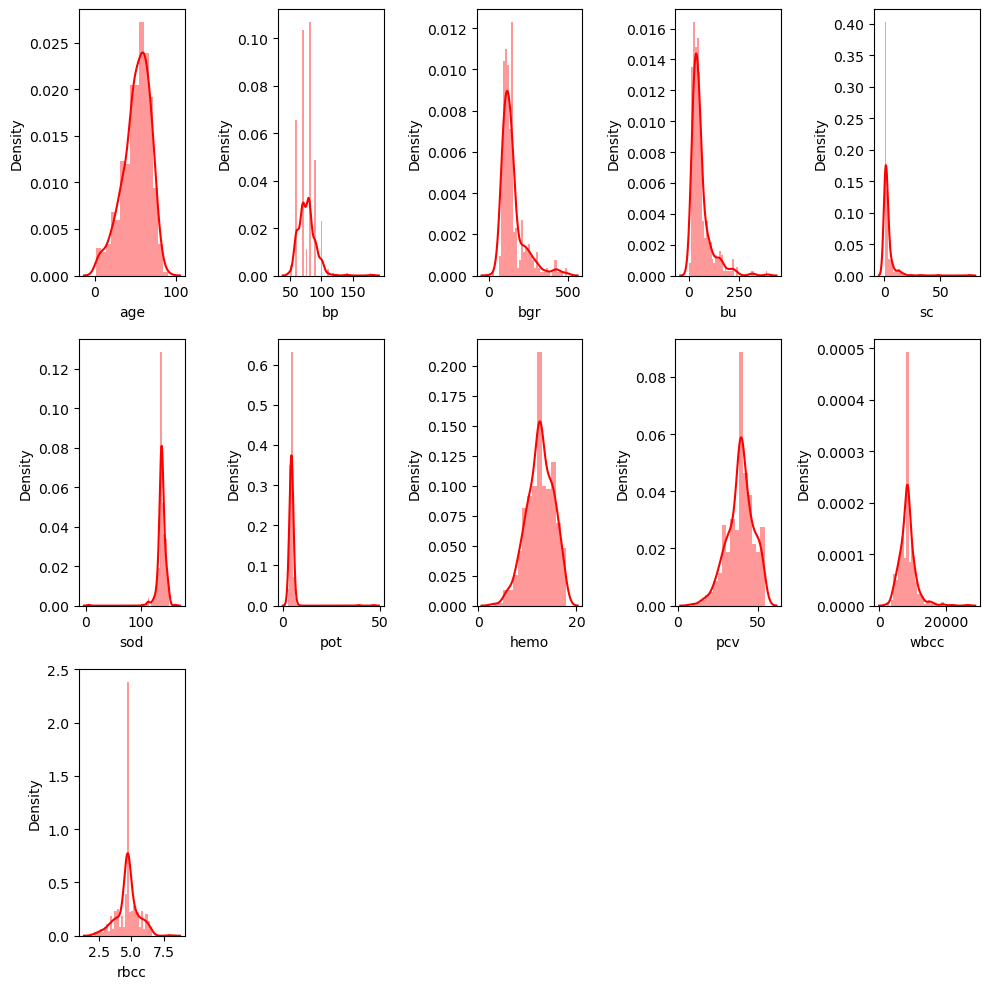

In [30]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in numeric_columns:
    if plotnumber<=14:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column],color="red",kde=True)
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Target Class Visualization
* ckd as 1
* notckd and no as 0

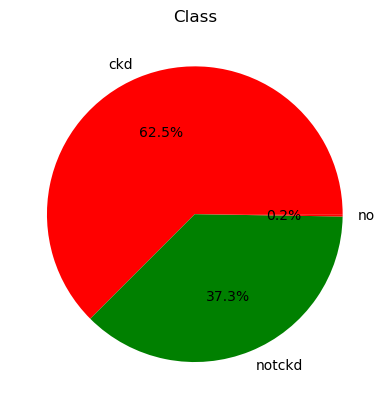

In [32]:
plt.pie(df['class'].value_counts(),labels=df['class'].value_counts().index,colors=['r','g'],autopct='%1.1f%%')
plt.title('Class')
plt.show()

In [33]:
# Cleaning data and encoding

le = LabelEncoder()

def clean_data(data):
    df['sg'] = le.fit_transform(df['sg'].values)
    df['al'] = le.fit_transform(df['al'].values)
    df['su'] = le.fit_transform(df['su'].values)
    df['rbc'] = le.fit_transform(df['rbc'].values)
    df['pc'] = le.fit_transform(df['pc'].values)
    df['pcc'] = le.fit_transform(df['pcc'].values)
    df['ba'] = le.fit_transform(df['ba'].values)
    df['htn'] = le.fit_transform(df['htn'].values)
    df['dm'] = le.fit_transform(df['dm'].values)
    df['cad'] = le.fit_transform(df['cad'].values)
    df['appet'] = le.fit_transform(df['appet'].values)
    df['pe'] = le.fit_transform(df['pe'].values)
    df['ane'] = le.fit_transform(df['ane'].values)

    df['class'].replace({'ckd': 1, 'ckd\t': 1, 'notckd': 0}, inplace=True)

    df.ffill(inplace=True)

    return df

In [34]:
data = clean_data(df)

In [35]:
df['class'].value_counts()
df.replace('no', 0, inplace=True)
print(df['class'].value_counts())

class
1    250
0    150
Name: count, dtype: int64


In [36]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.000000,3,1,0,1,1,0,0,121.000000,36.000000,1.200000,137.528754,4.627244,15.400000,44.000000,7800.000000,5.200000,1,1,0,0,1,0,1
1,7.000000,50.000000,3,4,0,1,1,0,0,148.036517,18.000000,0.800000,137.528754,4.627244,11.300000,38.000000,6000.000000,4.707435,0,0,0,0,1,0,1
2,62.000000,80.000000,1,2,3,1,1,0,0,423.000000,53.000000,1.800000,137.528754,4.627244,9.600000,31.000000,7500.000000,4.707435,0,1,0,2,1,1,1
3,48.000000,70.000000,0,4,0,1,0,1,0,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,32.000000,6700.000000,3.900000,1,0,0,2,2,1,1
4,51.000000,80.000000,1,2,0,1,1,0,0,106.000000,26.000000,1.400000,137.528754,4.627244,11.600000,35.000000,7300.000000,4.600000,0,0,0,0,1,0,1


In [38]:
df.corrwith(df['class']).abs().sort_values(ascending=False)

class   1.000000
hemo    0.729628
pcv     0.690060
sg      0.659504
rbcc    0.590913
htn     0.590438
dm      0.559060
al      0.531562
bgr     0.401374
appet   0.389211
pe      0.379163
pc      0.375154
bu      0.372033
sod     0.342288
ane     0.325396
su      0.294555
sc      0.294079
bp      0.290600
rbc     0.282642
pcc     0.265313
cad     0.236088
age     0.225405
wbcc    0.205274
ba      0.186871
pot     0.076921
dtype: float64

## MODEL TRAINING
3) What is the performance of the build model/ models (Based on your target grade)? You need to provide discussion and justification of how the model is performing (discuss different metrics like accuracy, confusion matrix, etc.) based on the selected dataset.

In [39]:
X = df.drop(['class'], axis=1) 
y = df['class'] 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 24)
(120, 24)
(280,)
(120,)


Through Grid Search hyperparameter tuning  we got better prediction.

In [42]:
dtree = DecisionTreeClassifier(random_state=123)

In [43]:
param_grid = {
    "max_depth": [3, 5, 7, 10, 15, 20, None],
    "min_samples_leaf": [1, 3, 5, 10, 20],
    'min_samples_split': [45, 60, 75],
    "max_features": [None, 'sqrt', 'log2'],
     "criterion": ["gini", "entropy"]
}


dtree = DecisionTreeClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 10, 20],
                         'min_samples_split': [45, 60, 75]})

Grid SearchCV gives best params for predicting with good accuracy without being overfitted.

In [45]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 45}

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [48]:
print("Accuracy on Training set",dtree.score(X_train,y_train))
print("Accuracy on Testing set",dtree.score(X_test,y_test))

Accuracy on Training set 1.0
Accuracy on Testing set 0.975


In [49]:
y_pred= dtree.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 1 1 0]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.97      0.99      0.98        70

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



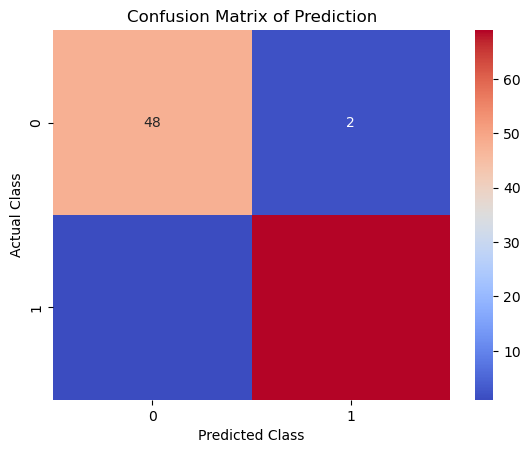

In [59]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='coolwarm',fmt='d',cbar=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix of Prediction')
plt.show()

From training and testing accuracy score we conclude the model is not overfitted, but given good score predictions.
* Accuracy as 1.0 on training and 0.97 on testing.
* Precision as 0 - '0.98' and 1-'0.97'
* Recall as 0 - '0.96' and 1-'0.99'
* F1 Score as 0- '0.97' and 1-'0.98'

Confusion matrix Actual and predicted True positive are 48 and False negative with 64 is high. 

## PICKLING THE BEST MODEL AS 'model.pkl'.

In [61]:
import pickle
d = open('model.pkl','wb')
pickle.dump(dtree,d)
d.close()

In [62]:
import zipfile
zipfile.ZipFile('model.zip',mode='w').write('model.pkl')

## REFERENCES

1) archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. Available at: https://archive.ics.uci.edu/dataset/336/chronic%252Bkidney%252Bdisease.